# LeNet Architecture
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Let us load the MNIST data, which comes pre-loaded with TensorFlow.

In [1]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", reshape=False)
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

C:\Users\maras\Miniconda3\envs\carnd-term1\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz

Image Shape: (28, 28, 1)

Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.

However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

In [2]:
import numpy as np

# Pad images with 0s
X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
print("Updated Image Shape: {}".format(X_train[0].shape))

Updated Image Shape: (32, 32, 1)


## Visualize Data

View a sample from the dataset.

3


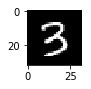

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

## Preprocess Data

Shuffle the training data.

In [4]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

In [7]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1:** Input is 32x32x1.

* **Convolutional** with 5x5x6 Filter, output shape is 28x28x6.

* **Activation** A **Relu** activation function is applied.

* **Pooling** A **max pooling** 2x2 with a stride of 2 is the output of the first layer (shape 14x14x6).

**Layer 2:** Input is 14x14x6.

* **Convolutional** with 5x5x16 Filter, output shape is 10x10x16.

* **Activation** A **Relu** activation function is applied.

* **Pooling** A **max pooling** 2x2 with a stride of 2 is the output of the second layer (shape 5x5x16).

* **Flatten.** Flatten the output (400).

**Layer 3:**

* **Fully Connected.** (400, 120)
* **Activation.** A **Relu** activation function is applied.

**Layer 4:**

* **Fully Connected.** (120, 84)
* **Activation.** A **Relu** activation function is applied.

**Layer 5:**

* **Fully Connected (Logits).** (84, 10)

In [15]:
from tensorflow.contrib.layers import flatten

mu = 0
sigma = 0.1

weights = {
    'wc1': tf.Variable(tf.truncated_normal([5, 5, 1, 6], mean = mu, stddev = sigma )),
    'wc2': tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean = mu, stddev = sigma )),
    'wfc1': tf.Variable(tf.truncated_normal(shape = (400, 120), mean = mu, stddev = sigma)),
    'wfc2': tf.Variable(tf.truncated_normal(shape = (120, 84), mean = mu, stddev = sigma)),
    'out': tf.Variable(tf.truncated_normal(shape = (84, 10), mean = mu, stddev = sigma))
}

biases = {
    'bc1': tf.Variable(tf.zeros(6)),
    'bc2': tf.Variable(tf.zeros(16)),
    'bfc1': tf.Variable(tf.zeros(120)),
    'bfc2': tf.Variable(tf.zeros(84)),
    'out': tf.Variable(tf.zeros(10)),
}

def fc(x, W, b, Relu = True):
    x = tf.matmul(x, W)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x) if Relu else x

def convRelu(x, W, b, s = 1, padding = 'VALID'):
    x = tf.nn.conv2d(x, W, strides = [1, s, s, 1], padding = padding)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxPooling(x, k = 2, padding = 'VALID'):
    return tf.nn.max_pool(x, ksize = [1, k, k, 1], strides = [1, k, k, 1], padding = padding)

def LeNet(x):    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    x = convRelu(x, weights['wc1'], biases['bc1'])

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    x = maxPooling(x, k = 2)
    
    # Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16.
    
    x = convRelu(x, weights['wc2'], biases['bc2'])

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    
    x = maxPooling(x, k = 2)

    # Flatten. Input = 5x5x16. Output = 400.
    
    x = flatten(x)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    
    x = fc(x, weights['wfc1'], biases['bfc1'])

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    
    x = fc(x, weights['wfc2'], biases['bfc2'])

    # Layer 5: Fully Connected. Input = 84. Output = 10.
    
    logits = fc(x, weights['out'], biases['out'], Relu = False)
    
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [9]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 10)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

In [10]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [11]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_loss = 0
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y})
        total_loss += (loss * len(batch_x))
        total_accuracy += (accuracy * len(batch_x))
    return total_loss / num_examples, total_accuracy / num_examples

## Train the Model
Runs the training data through the training pipeline to train the model, before each epoch shuffles the training set.

After each epoch, measures the loss and accuracy of the validation set, finally saves the model after training.

In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training on {} samples (Epochs: {}, Batch Size: {}, Learning Rate: {})...".format(num_examples, EPOCHS, BATCH_SIZE, rate))
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_loss, validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {}: Validation Loss: = {:.3f},  Validation Accuracy = {:.3f}".format(i+1, validation_loss, validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training on 55000 samples (Epochs: 10, Batch Size: 128, Learning Rate: 0.001)...

EPOCH 1: Validation Loss: = 0.109,  Validation Accuracy = 0.968

EPOCH 2: Validation Loss: = 0.070,  Validation Accuracy = 0.979

EPOCH 3: Validation Loss: = 0.060,  Validation Accuracy = 0.982

EPOCH 4: Validation Loss: = 0.054,  Validation Accuracy = 0.984

EPOCH 5: Validation Loss: = 0.056,  Validation Accuracy = 0.983

EPOCH 6: Validation Loss: = 0.048,  Validation Accuracy = 0.984

EPOCH 7: Validation Loss: = 0.046,  Validation Accuracy = 0.987

EPOCH 8: Validation Loss: = 0.054,  Validation Accuracy = 0.983

EPOCH 9: Validation Loss: = 0.042,  Validation Accuracy = 0.988

EPOCH 10: Validation Loss: = 0.039,  Validation Accuracy = 0.989

Model saved


## Evaluate the Model
Evaluates the performance of the model on the test set, note that this should be run only once.

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate the test results. We wouldn't get a true measure of how well your model would perform against real data.

In [12]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_loss, test_accuracy = evaluate(X_test, y_test)
    print("Test Loss: = {:.3f}, Test Accuracy = {:.3f}".format(test_loss, test_accuracy))

INFO:tensorflow:Restoring parameters from .\lenet
Test Loss: = 0.039, Test Accuracy = 0.987


## Getting Predictions

We can now test the model to get a prediction on a random image from the testing dataset:

INFO:tensorflow:Restoring parameters from .\lenet
Predicted: [9] , Expected 9


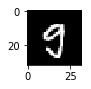

In [14]:
index = random.randint(0, len(X_test))
image = X_test[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    prediction = sess.run(tf.argmax(logits, 1), feed_dict = {x: [X_test[index]]})
    print("Predicted: {} , Expected {}".format(prediction, y_test[index]))